<center><h1 style="font-size:35px; font-family: 'Times New Roman'; letter-spacing: 0.1em;"> PROJET DE IML</h1></center>
 <center><h1 style="font-size:35px; font-family: 'Times New Roman'; letter-spacing: 0.1em;">Groupe 2 :  Jean MOYENGA, Julien Parfait ASSALA BIDIAS, MAME MOR DIOUM</h1></center>

<center><h1 style="font-size:35px; font-family: 'Times New Roman'; letter-spacing: 0.1em;">HOUSE PRICE PREDICTION 🏡</h1></center>

<center><img src="https://images.unsplash.com/photo-1516156008625-3a9d6067fab5?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=870&q=80"></center>

## Objectif final: 
#### Construire un modèle pour la prédiction des prix des maisons en fonction des caractéristiques souhaitées. 

## IMPORTATION DES LIBRAIRY

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor 

from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
from yellowbrick.target import FeatureCorrelation
from yellowbrick.model_selection import LearningCurve

## IMPORTATION DU DATASET

In [2]:
## afficharge de plus de colonnes

pd.set_option('display.max_rows', 111)
pd.set_option('display.max_colum', 111)

In [3]:
## importation du dataframe 

data = pd.read_csv('data.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
## supression des variables date et country

data.drop(columns = ['date', 'country'], axis = 1, inplace = True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052


In [5]:
## création d'une copy de data set 

df = data.copy()
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119


In [6]:
## taille de la data set 
df.shape

(4600, 16)

* la base de données contient 4600 lignes ou individus et 16 colonnes ou variables

int64      9
float64    4
object     3
dtype: int64


<AxesSubplot:ylabel='None'>

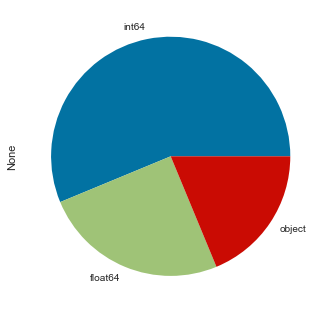

In [7]:
## nombre de variable par type

print(df.dtypes.value_counts())
df.dtypes.value_counts().plot.pie()

* la base contient 09 variables de type int64, 04 variables de type float64 et 03 variables de type object 

## I- EDA (Exploratory Data Analysis)

<AxesSubplot:>

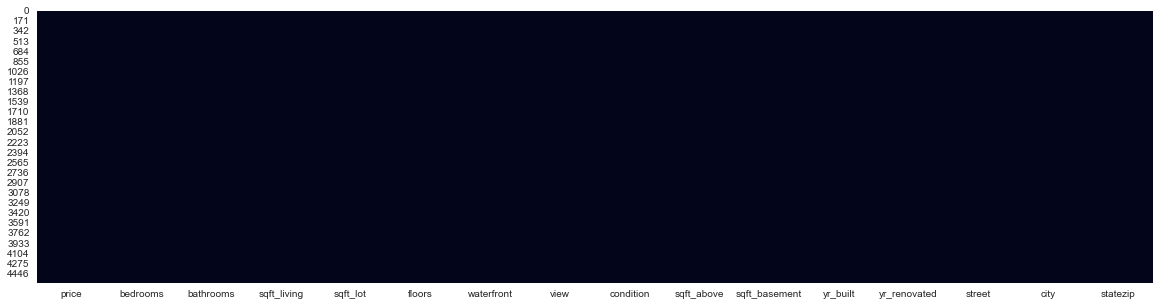

In [8]:
## identificationdes valeurs manquantes 

df.isna()
plt.figure(figsize = (20, 5))
sns.heatmap(df.isna(), cbar = False)

* Le heatmap ci-dessus montre qu'il n'ya aucune valeur manquante dans le dataset  

In [9]:
## identification des valeurs nulles

for col in df.columns:
    val_nul = (df[col]==0).sum()
    print(f'{col :-<30} {val_nul}')    

price------------------------- 49
bedrooms---------------------- 2
bathrooms--------------------- 2
sqft_living------------------- 0
sqft_lot---------------------- 0
floors------------------------ 0
waterfront-------------------- 4567
view-------------------------- 4140
condition--------------------- 0
sqft_above-------------------- 0
sqft_basement----------------- 2745
yr_built---------------------- 0
yr_renovated------------------ 2735
street------------------------ 0
city-------------------------- 0
statezip---------------------- 0


* On remarque qu''il ya 49 valeurs nulles au niveau de la variable prix. Ces valeurs sont nuissibles pour la prédiction,
 nous allons de ce fait supprimer toutes ces 49 valeurs. Ce qui revient en définitif à supprimer 49 lignes dans notre base de données. 

In [10]:
 ## suppression des 49 valeurs nulles 

df.drop(df[df['price']==0].index, inplace=True)

In [11]:
df.shape

(4551, 16)

In [12]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052


##  Data visualization 

In [13]:
## Visualisation de la distributin des variables 

## visualization des catégories des variables de type object 

for col in df.select_dtypes('object'):
    print(f'{col :-<30} {df[col].unique()}')

street------------------------ ['18810 Densmore Ave N' '709 W Blaine St' '26206-26214 143rd Ave SE' ...
 '759 Ilwaco Pl NE' '5148 S Creston St' '18717 SE 258th St']
city-------------------------- ['Shoreline' 'Seattle' 'Kent' 'Bellevue' 'Redmond' 'Maple Valley'
 'North Bend' 'Lake Forest Park' 'Sammamish' 'Auburn' 'Des Moines'
 'Bothell' 'Federal Way' 'Kirkland' 'Issaquah' 'Woodinville'
 'Normandy Park' 'Fall City' 'Renton' 'Carnation' 'Snoqualmie' 'Duvall'
 'Burien' 'Covington' 'Inglewood-Finn Hill' 'Kenmore' 'Newcastle'
 'Mercer Island' 'Black Diamond' 'Ravensdale' 'Clyde Hill' 'Algona'
 'Skykomish' 'Tukwila' 'Vashon' 'Yarrow Point' 'SeaTac' 'Medina'
 'Enumclaw' 'Snoqualmie Pass' 'Pacific' 'Beaux Arts Village' 'Preston'
 'Milton']
statezip---------------------- ['WA 98133' 'WA 98119' 'WA 98042' 'WA 98008' 'WA 98052' 'WA 98115'
 'WA 98038' 'WA 98045' 'WA 98155' 'WA 98105' 'WA 98074' 'WA 98106'
 'WA 98007' 'WA 98092' 'WA 98198' 'WA 98006' 'WA 98102' 'WA 98011'
 'WA 98125' 'WA 98003' 'W

* Les variables street, city et statezip possèdent beaucoup trop de modalités, nous allons supprimer ces variables pour l'analyse.

In [14]:
df.drop(['street', 'statezip'], axis = 1, inplace = True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,Seattle
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,Bellevue
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,Renton
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,Seattle


In [15]:
df.shape

(4551, 14)

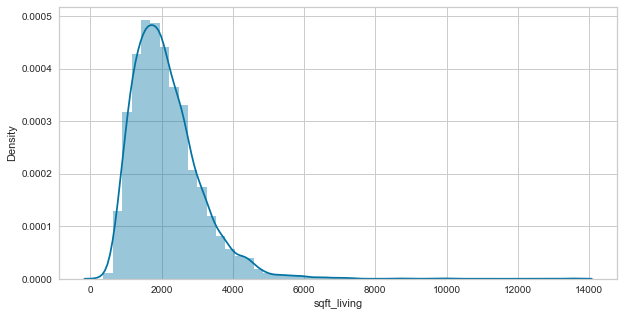

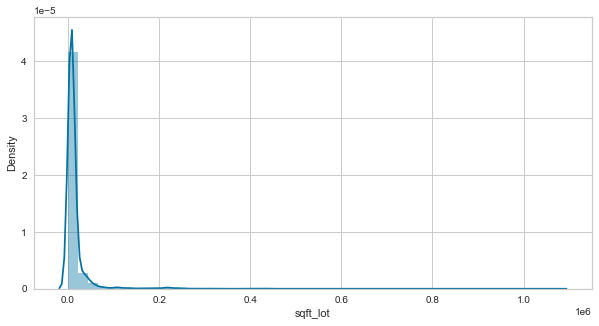

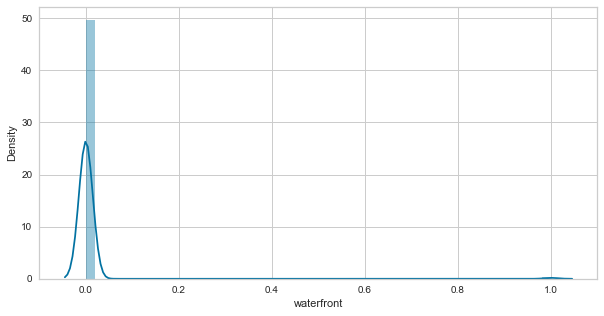

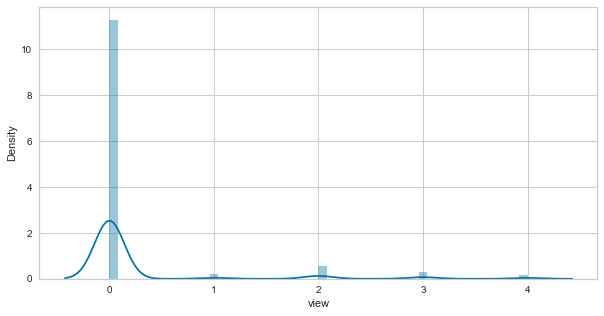

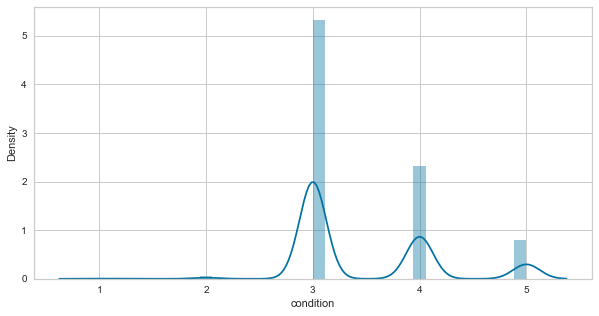

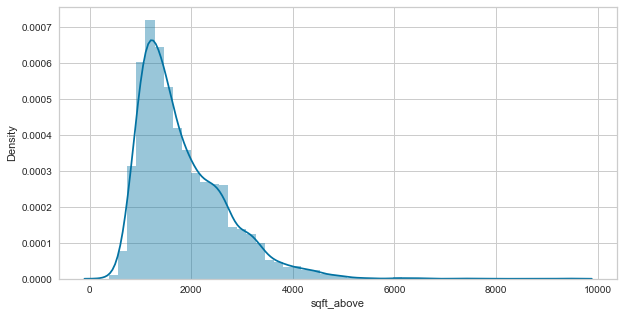

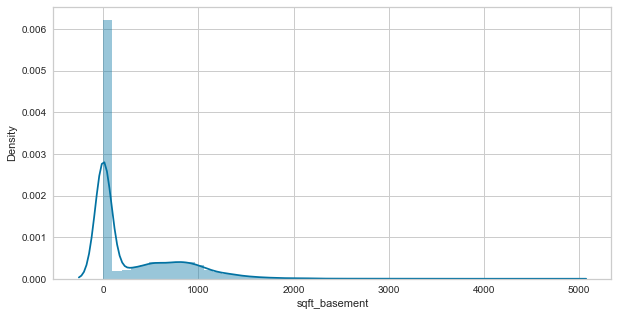

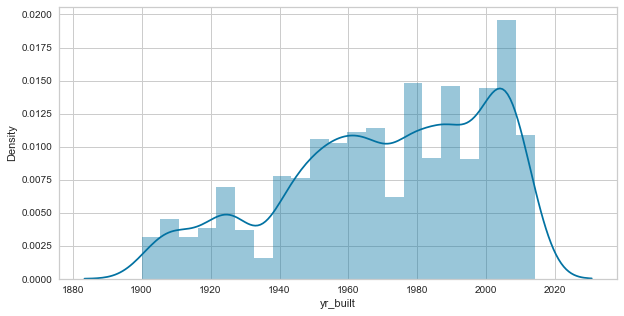

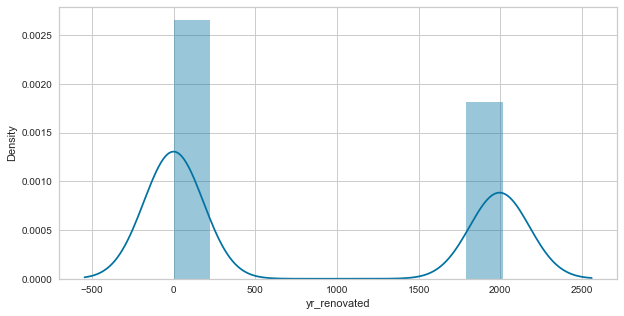

In [16]:
## visualization des variables de type integer

for col in df.select_dtypes('int'):
    plt.figure(figsize=(10,5))
    sns.distplot(df[col])
    

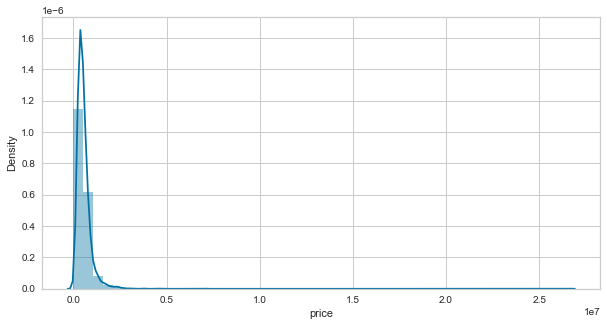

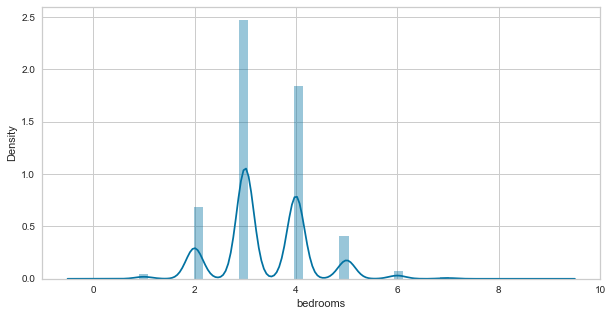

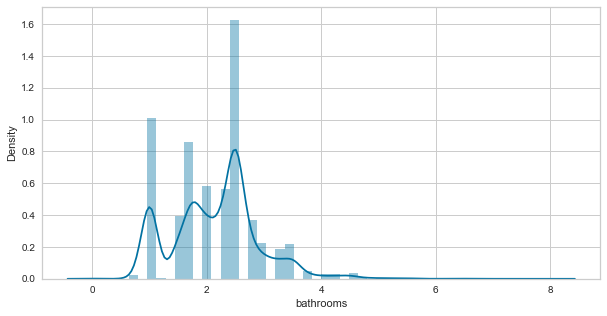

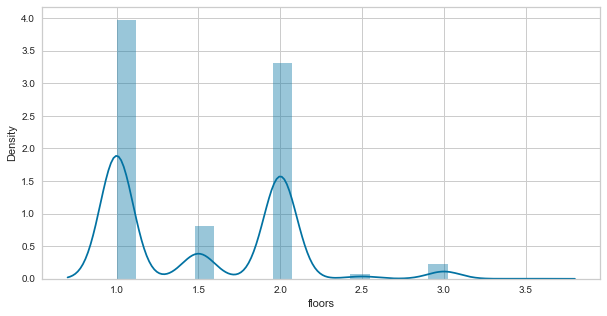

In [17]:
## représentation des variables de type float

for col in df.select_dtypes('float'):
    plt.figure(figsize=(10, 5))
    sns.distplot(df[col])

In [18]:
## visualization des tendances centrales des différenctes variables 

df.describe(include = 'all')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
count,4.551000e+03,4551.000000,4551.000000,4551.000000,4.551000e+03,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seattle
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1561
mean,5.579059e+05,3.394639,2.155021,2132.372226,1.483528e+04,1.512195,0.006592,0.234674,3.449352,1822.221710,310.150516,1970.795649,808.564052,NaN
std,5.639299e+05,0.904595,0.776351,955.949708,3.596408e+04,0.538531,0.080932,0.765373,0.675160,854.452888,461.987629,29.760073,979.421487,NaN
min,7.800000e+03,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,NaN
25%,3.262643e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,NaN
50%,4.650000e+05,3.000000,2.250000,1970.000000,7.680000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,NaN
75%,6.575000e+05,4.000000,2.500000,2610.000000,1.097800e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,600.000000,1997.000000,1999.000000,NaN


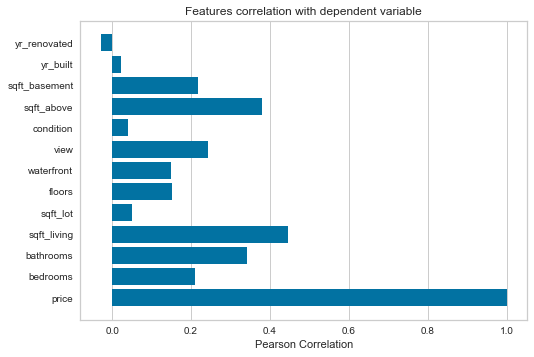

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [19]:
## visualisation des correlation entre les variables 

x, y = df.drop('city', axis = 1), df['price']
viz = FeatureCorrelation()
viz.fit(x, y)
viz.show()

* Le graphique montre que les variable yr_renovated, sqft_lot, yr_built et condition ont de très faible correlation avec la target(prix). Nous allons supprimer ces variables. 

In [20]:
df.drop(['yr_renovated', 'sqft_lot', 'yr_built', 'condition'], axis = 1, inplace = True)
print(f'df.shape:{df.shape}')
df.head()      

df.shape:(4551, 10)


,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement,city
0,313000.0,3.0,1.50,1340,1.5,0,0,1340,0,Shoreline
1,2384000.0,5.0,2.50,3650,2.0,0,4,3370,280,Seattle
2,342000.0,3.0,2.00,1930,1.0,0,0,1930,0,Kent
3,420000.0,3.0,2.25,2000,1.0,0,0,1000,1000,Bellevue
4,550000.0,4.0,2.50,1940,1.0,0,0,1140,800,Redmond


<AxesSubplot:>

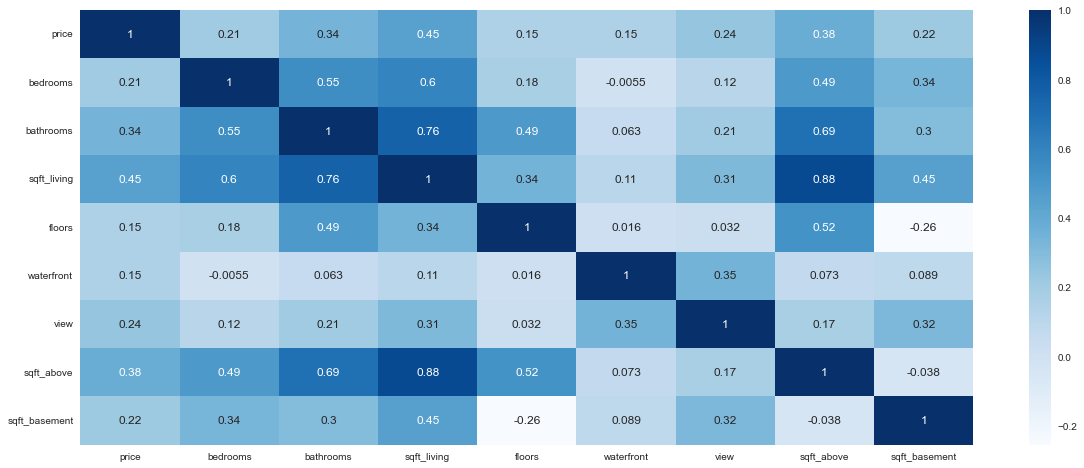

In [21]:
## visualization des correlations entre les variables quantitative de la base 

plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, )

<Figure size 360x144 with 0 Axes>

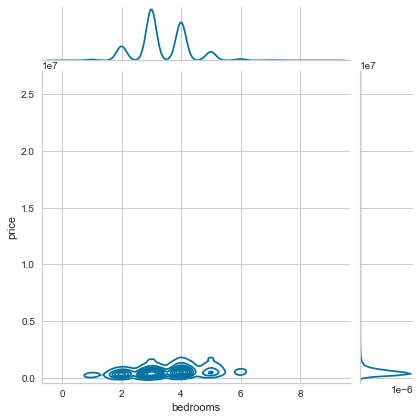

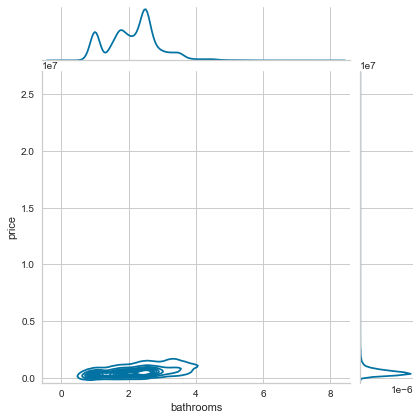

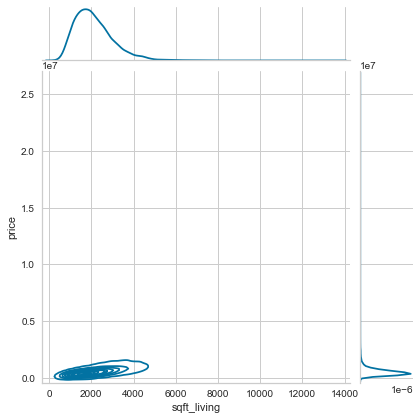

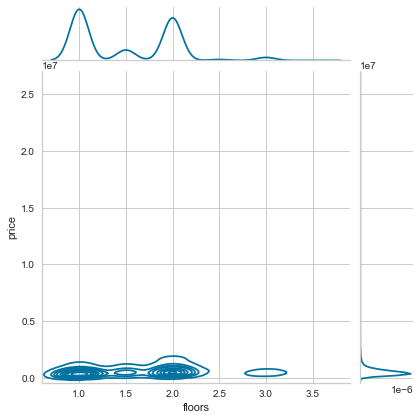

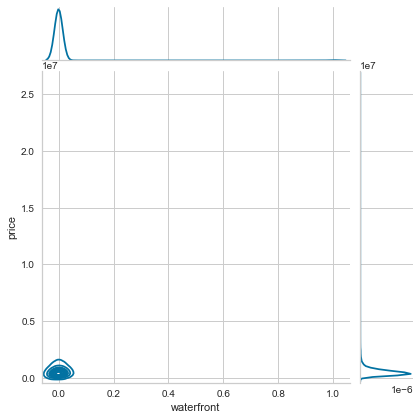

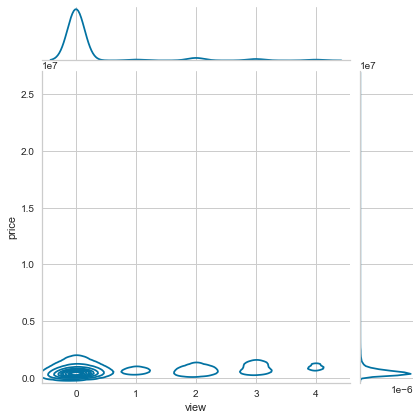

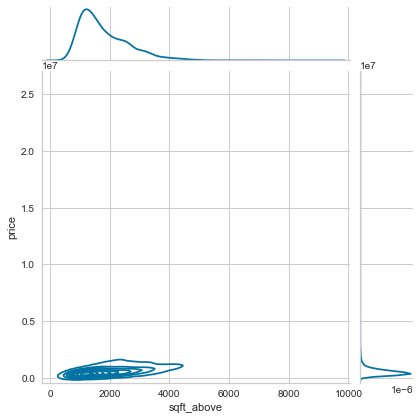

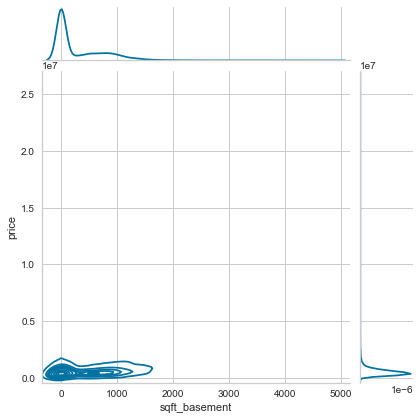

In [22]:
## visualization de chaque variable quantitative vs price

plt.figure(figsize=(5,2))
sns.jointplot(x=df['bedrooms'], y=df['price'], kind = 'kde')
sns.jointplot(x=df['bathrooms'], y=df['price'], kind ='kde')
sns.jointplot(x=df['sqft_living'], y=df["price"], kind ='kde')
sns.jointplot(x=df['floors'], y=df["price"], kind ='kde')
sns.jointplot(x=df['waterfront'], y=df["price"], kind ='kde')
sns.jointplot(x=df["view"], y=df["price"], kind ='kde')
sns.jointplot(x=df["sqft_above"], y=df["price"], kind ='kde')
sns.jointplot(x=df["sqft_basement"], y=df["price"], kind ='kde')
plt.show()

<Figure size 720x360 with 0 Axes>

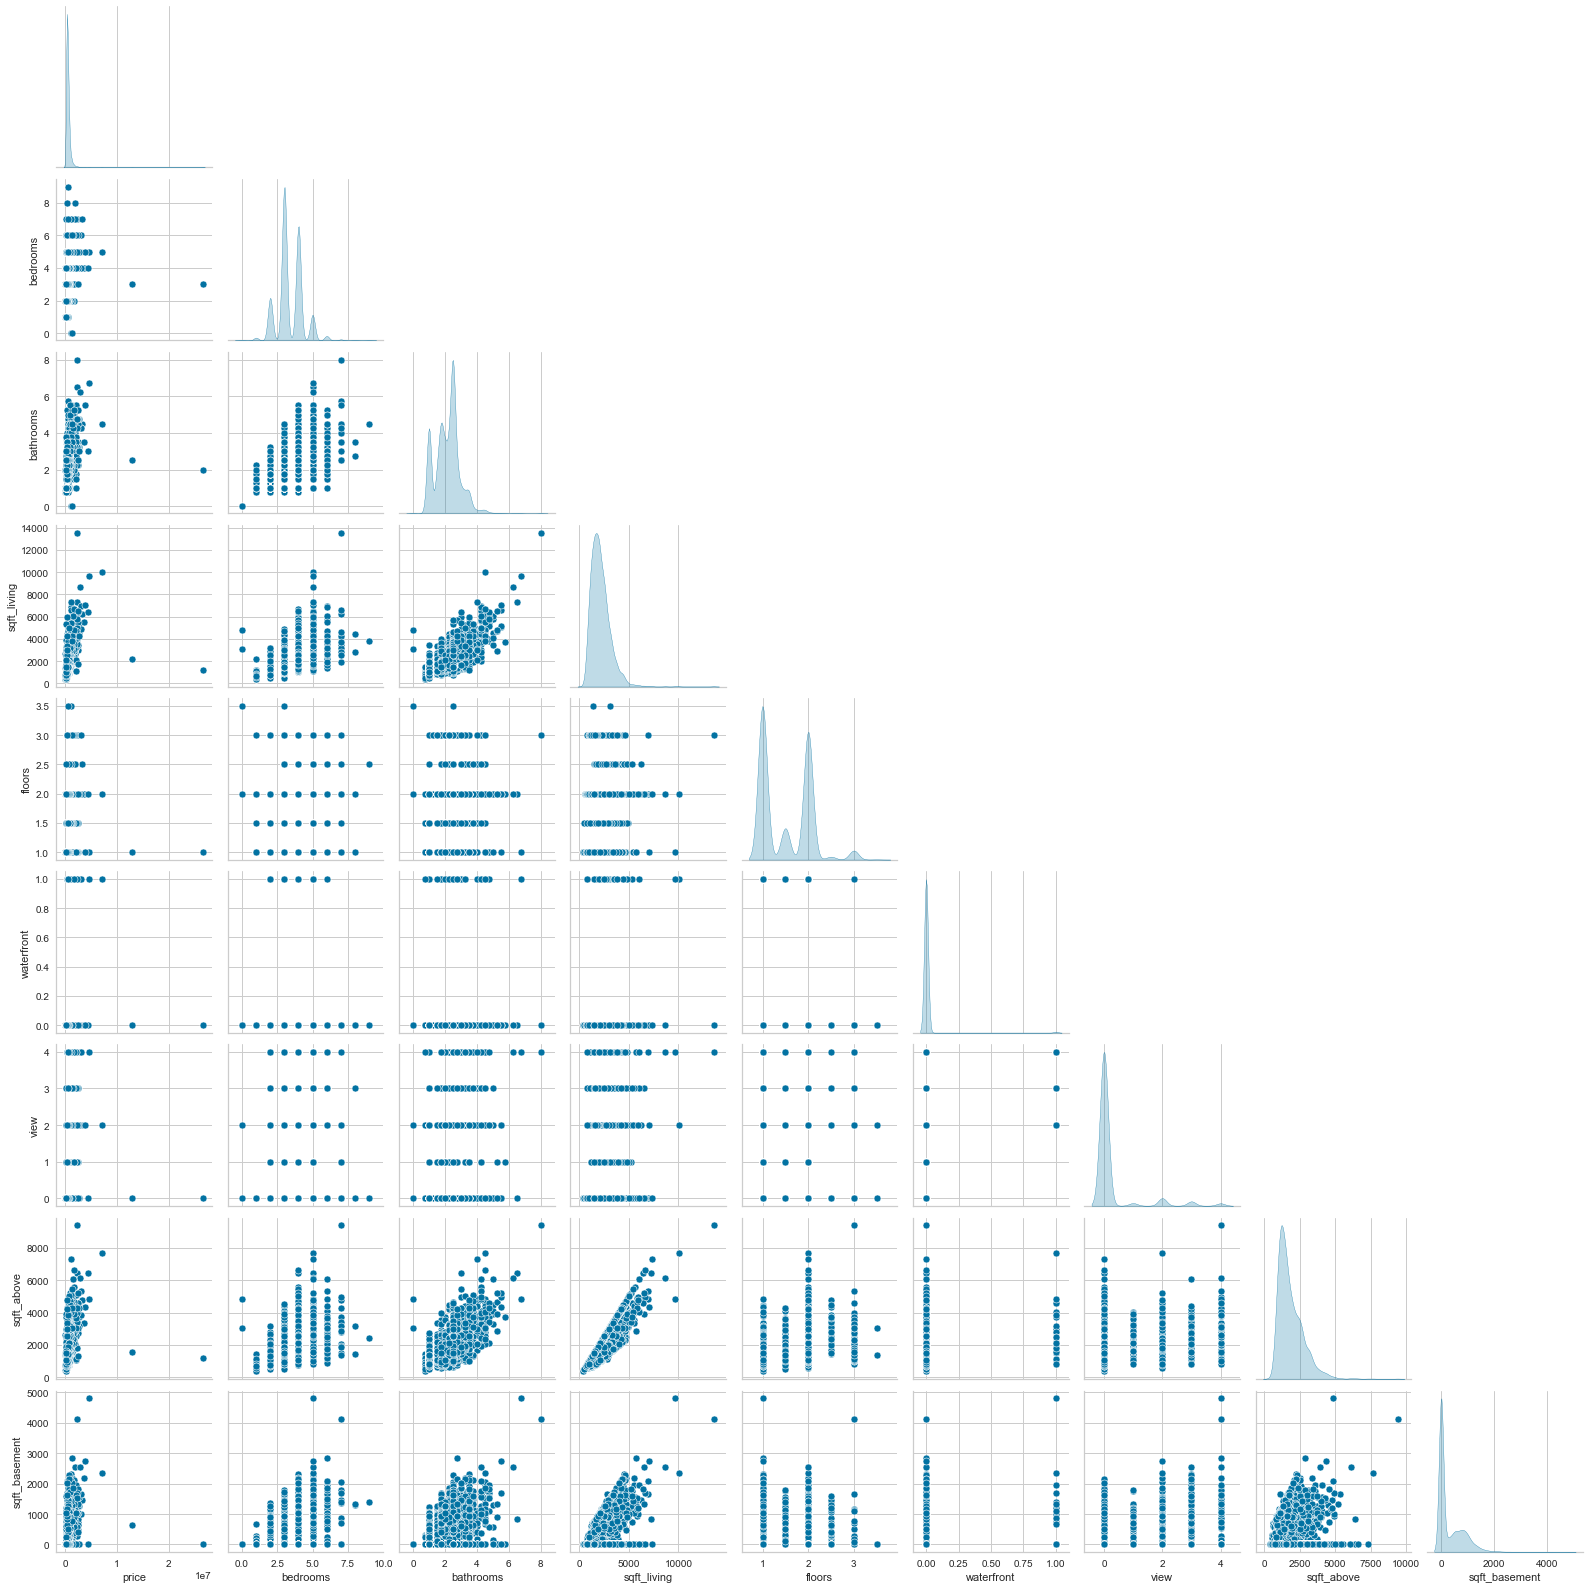

In [23]:

plt.figure(figsize = (10, 5))
sns.pairplot( data= df, corner = True, diag_kind = 'kde')

## II-PRE-PROCESSING

* Mettre les variables dans un format propice pour le modèle de ML 

In [24]:
## la target 

X = df.drop('price', axis = 1)
Y = pd.DataFrame(df['price'])

In [25]:
print(f'X.shape:{X.shape}\nY.shape: {Y.shape}')

X.shape:(4551, 9)
Y.shape: (4551, 1)


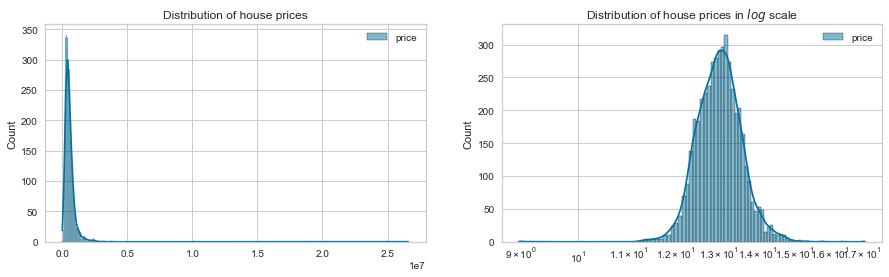

In [26]:
## visualization de la target 

log_y = np.log(Y)
## representation graphique de la distribution de la target y 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

## distribution brut de la variable target y
sns.histplot(Y, color='b', kde=True, ax=axes[0])
axes[0].set_title('Distribution of house prices')

## distribution de log_y de la variable target y
sns.histplot(log_y, color='r', kde=True, ax=axes[1])
axes[1].set_title('Distribution of house prices in $log$ scale')
axes[1].set_xscale('log');

In [27]:
## tendance du log_y

log_y.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4551.0,13.064963,0.542789,8.961879,12.695463,13.049793,13.3962,17.096046


### One Hot Encoding
* Encodage de la variable city par la methode du one hot encoding 

In [28]:
##encodage de la variable city

X = pd.get_dummies(X, columns= ['city'])
print(f'X.shape: {X.shape}')
X.head()

X.shape: (4551, 52)


,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement,city_Algona,city_Auburn,city_Beaux Arts Village,city_Bellevue,city_Black Diamond,city_Bothell,city_Burien,city_Carnation,city_Clyde Hill,city_Covington,city_Des Moines,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Inglewood-Finn Hill,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Lake Forest Park,city_Maple Valley,city_Medina,city_Mercer Island,city_Milton,city_Newcastle,city_Normandy Park,city_North Bend,city_Pacific,city_Preston,city_Ravensdale,city_Redmond,city_Renton,city_Sammamish,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,3.0,1.50,1340,1.5,0,0,1340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,2.50,3650,2.0,0,4,3370,280,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,3.0,2.00,1930,1.0,0,0,1930,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3.0,2.25,2000,1.0,0,0,1000,1000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.0,2.50,1940,1.0,0,0,1140,800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


### Standardizing the Data

* Standardisation de X par la methode du RobusteScaler

In [29]:
## standardization de X 

scaler = RobustScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,0.0,-1.000000,-0.547826,0.0,0.0,0.0,-0.225225,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.333333,1.460870,0.5,0.0,4.0,1.603604,0.466667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,-0.333333,-0.034783,-0.5,0.0,0.0,0.306306,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.026087,-0.5,0.0,0.0,-0.531532,1.666667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.333333,-0.026087,-0.5,0.0,0.0,-0.405405,1.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
## standardization de log_y

Y = scaler.fit_transform(log_y)
pd.DataFrame(Y).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,...,4496,4497,4498,4499,4500,4501,4502,4503,4504,4505,4506,4507,4508,4509,4510,4511,4512,4513,4514,4515,4516,4517,4518,4519,4520,4521,4522,4523,4524,4525,4526,4527,4528,4529,4530,4531,4532,4533,4534,4535,4536,4537,4538,4539,4540,4541,4542,4543,4544,4545,4546,4547,4548,4549,4550
0,-0.564883,2.33254,-0.438434,-0.145251,0.239578,0.074733,-0.467946,0.051241,-0.038887,0.45585,-0.006151,1.572901,0.336131,-0.34555,1.352917,-0.929073,-0.148653,-0.335809,-0.840931,-0.749591,0.68219,-0.095173,0.424286,0.393174,0.089221,-0.698619,0.398987,0.579649,0.531833,0.75634,-0.278719,0.103421,0.477975,0.422005,-0.214878,0.373231,-0.078864,-0.687645,-0.204215,0.68219,-0.467946,-0.829635,-0.585548,-0.079026,-0.973906,-0.555793,-0.086995,-0.188368,-0.060495,0.840516,0.433376,0.239578,0.783182,-0.703635,0.015263,...,-1.211235,-0.729495,-1.421288,-0.51037,-1.274478,-0.306979,-1.094218,-0.363254,0.536265,-0.19671,-0.673861,-0.806388,0.370301,-0.876753,-1.1025,-0.839963,0.536265,-1.457114,0.01981,-0.001228,-1.794315,-0.101383,0.219984,-0.333433,0.528609,0.261857,-1.450032,-0.781221,-0.542266,0.241152,1.454279,0.325177,-0.914436,-0.684073,0.526538,-0.031683,-0.711147,0.024946,-0.193411,-0.709846,0.064344,0.065661,-0.11075,-1.006897,-1.332336,-0.285523,-0.22862,-0.868695,-0.676887,-1.130251,-0.587091,0.198338,-0.155809,-1.17999,-1.064146


In [31]:
## identification des train_set et test_set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2, random_state = 56 )
print(f'X_train.shape: {X_train.shape}\nX_test.shape:{X_test.shape}\nY_train.shape:{Y_train.shape}\nY_test.shape:{Y_test.shape}')

X_train.shape: (3640, 52)
X_test.shape:(911, 52)
Y_train.shape:(3640, 1)
Y_test.shape:(911, 1)


## III-MODELISATION
* Nous utiliserons les quelsques modèles du Linear_Model(LinearRegression, Lasso, Ridge, ElasticNet) et quelsques modèles ensemblistes(RandomForest, XGBoost). Une comparaison sera faite pour ensuite choisir le meilleur modèle.

In [32]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, Y_train, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [33]:
## le modele

models=pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

## Linear_Model Methods

### Linear Model Regression

In [34]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
lin_reg_pred = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(Y_test, lin_reg_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 9011341.00093037
MSE: 7.397708254448923e+16
RMSE: 271987283.7918884
R2 Score: -1.2725429205083986e+17
------------------------------
RMSE Cross-Validation: 327298615.56456846


### Ridge Regression

In [35]:
ridge = Ridge()
ridge.fit(X_train, Y_train)
ridge_pred = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(Y_test, ridge_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.2678214668409074
MSE: 0.13773185254364706
RMSE: 0.3711224225826931
R2 Score: 0.7630756879638787
------------------------------
RMSE Cross-Validation: 0.4426482406398177


### Lasso Regression

In [36]:
lasso = Lasso()
lasso.fit(X_train, Y_train)
lasso_pred = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(Y_test, lasso_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.603282237902599
MSE: 0.58239577124609
RMSE: 0.763148590541901
R2 Score: -0.00182866117697289
------------------------------
RMSE Cross-Validation: 0.7764026561051612


### Elastic Net

In [37]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, Y_train)
elastic_pred = elastic_net.predict(X_test)

mae, mse, rmse, r_squared = evaluation(Y_test, elastic_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.603282237902599
MSE: 0.58239577124609
RMSE: 0.763148590541901
R2 Score: -0.00182866117697289
------------------------------
RMSE Cross-Validation: 0.7764026561051612


### SGDRegression

In [38]:
sgd= SGDRegressor(eta0=0.007)
sgd.fit(X_train, Y_train)
SGD_predict= sgd.predict(X_test)

mae, mse, rmse, r_squared= evaluation(Y_test, SGD_predict)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(sgd)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SGDRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.297584574240583
MSE: 0.1620523576796671
RMSE: 0.4025572725459908
R2 Score: 0.7212399118430537
------------------------------
RMSE Cross-Validation: 0.46282284727748274


## Ensemble Methods

### Random Forest Regressor

In [39]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, Y_train)
RDF_pred = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(Y_test, RDF_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.2996705450695016
MSE: 0.17197516735113194
RMSE: 0.4146988875691999
R2 Score: 0.704170840227015
------------------------------
RMSE Cross-Validation: 0.4610941369622573


### XGBoost Regressor


In [40]:
xgb = XGBRegressor(n_estimators=1500, learning_rate=0.01)
xgb.fit(X_train, Y_train)
xgb_pred = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(Y_test, xgb_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.2743512890017497
MSE: 0.1511093653614372
RMSE: 0.3887278808645416
R2 Score: 0.7400638866806213
------------------------------
RMSE Cross-Validation: 0.4382328370689267


## IV-MODELE VALIDATION 

### Comparaison des models

In [41]:
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
6,XGBRegressor,0.274351,0.151109,0.388728,0.740064,0.438233
1,Ridge,0.267821,0.137732,0.371122,0.763076,0.442648
5,RandomForestRegressor,0.299671,0.171975,0.414699,0.704171,0.461094
4,SGDRegressor,0.297585,0.162052,0.402557,0.72124,0.462823
2,Lasso,0.603282,0.582396,0.763149,-0.001829,0.776403
3,ElasticNet,0.603282,0.582396,0.763149,-0.001829,0.776403
0,LinearRegression,9011341.00093,73977082544489232.0,271987283.791888,-127254292050839856.0,327298615.564568


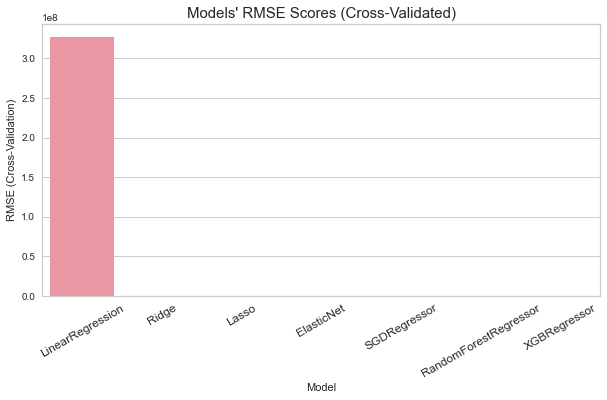

In [42]:
plt.figure(figsize=(10,5))
sns.barplot(x=models["Model"], y=models["RMSE (Cross-Validation)"])
plt.title("Models' RMSE Scores (Cross-Validated)", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

* Le graphe ci-dessus montre la représentation du RMSE score du cross validation par modele. On peut voir que le XGBRegressor a la petite valeur de RMSE, ce qui signifie que le modele XGBRegressor a un meilleur ajustement. Nous retiendrons donc comme modele final le XGBRegressor.

###  Courbe d'apprentissage 

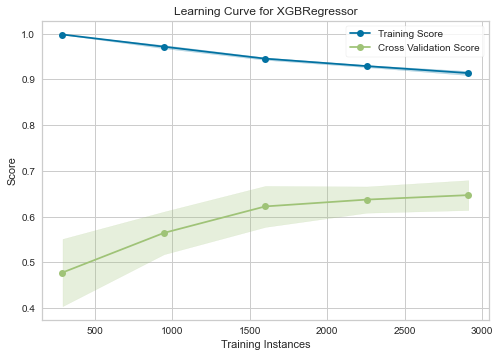

<AxesSubplot:title={'center':'Learning Curve for XGBRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [43]:
model = LearningCurve(XGBRegressor(), scoring = 'r2')
model.fit(X_train, Y_train)
model.show()